#  Logistic Regression, Classification metrics, Cross-validation

In this notebook, we will demonstrate how to:

1. Carry out logistic regression for classification
2. Compute classification metrics
3. Use class weights to account for imbalanced data
4. Carry out cross validation

We will use the ```credit.csv``` dataset from Notebook 1.

In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('credit.csv', index_col = 0)
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


Our target is ```Risk```, which is already a binary variable (good/bad). But some of sklearn's functions prefer boolean (i.e. True/False) values. 

Usually we set the class that we are more interested in (e.g. having a disease) as the "True" or "Positive" class. So let's create a new column ```Bad Risk``` which we will use as our target.

In [2]:
df['Bad Risk'] = df['Risk'] == 'bad'
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Bad Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,False
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,True
2,49,male,1,own,little,NaN,2096,12,education,good,False
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,False
4,53,male,2,free,little,little,4870,24,car,bad,True
...,...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good,False
996,40,male,3,own,little,little,3857,30,car,good,False
997,38,male,2,own,little,NaN,804,12,radio/TV,good,False
998,23,male,2,free,little,little,1845,45,radio/TV,bad,True


# Descriptive analytics

In Notebook 1, we plotted histograms, while in Notebook 3b, we plotted scatterplots and pairplots.

We can do pairplots here as well, with an additional parameter ```hue``` which tells seaborn to colour the points based on the target ```Bad Risk```.

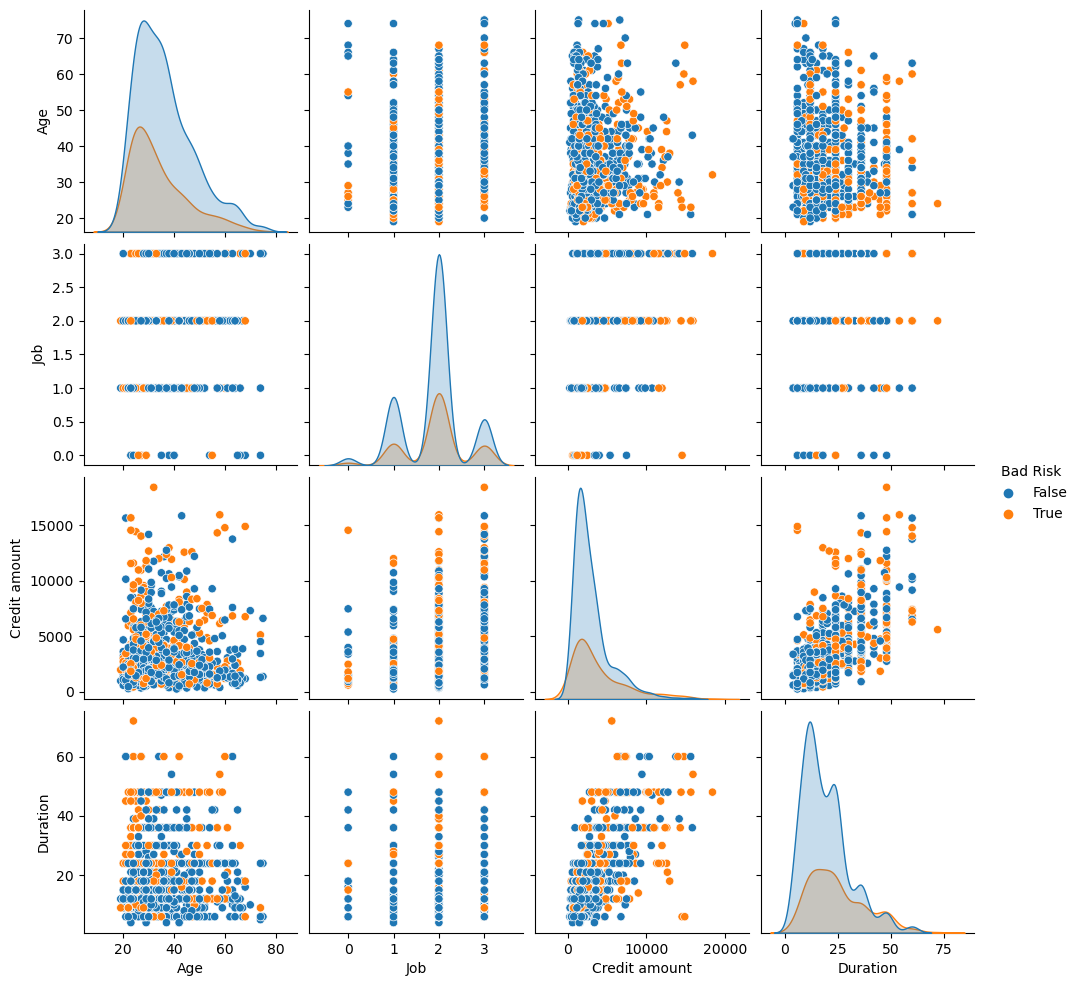

In [3]:
sns.pairplot(df[['Age', 'Job', 'Credit amount', 'Duration', 'Bad Risk']], hue = 'Bad Risk')

From the pairplot, we can see that the classes are not very distinct, so this is not an easy classification problem. 

Still, from Notebook 1 we know there are some patterns in our data (e.g. customers who are younger, or who have larger credit amounts tend to have higher risk).

Let's see if logistic regression can pick this up.

# Train-Test Split

For now, let's only use age, job, credit amount and duration as our features.

In [4]:
from sklearn.model_selection import train_test_split

X = df[['Age', 'Job', 'Credit amount', 'Duration']]
y = df['Bad Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

Let's compare the class proportions in ```y```, ```y_train``` and ```y_test```:

In [5]:
y.value_counts()[True] / len(y)

0.3

In [6]:
y_train.value_counts()[True] / len(y_train)

0.3157142857142857

In [7]:
y_test.value_counts()[True] / len(y_test)

0.2633333333333333

They're quite different! This is because we called train-test split without stratifying.

We can fix this by using a **stratified** version of the train-test split:

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023, stratify = y)

y_train.value_counts()[True] / len(y_train)

0.3

In [9]:
y_test.value_counts()[True] / len(y_test)

0.3

Let's fit a logistic regression model on this data.

# Logistic Regression

Scikit-learn's logistic regression model automatically comes with regularization, which we haven't covered yet. To get "ordinary" logistic regression (as we saw in the slides), we set the ```penalty``` parameter to ```None```.

In [10]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(penalty = None)
log.fit(X_train, y_train)

y_pred = log.predict(X_test)
y_pred

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,

# Evaluation

Let's compute a few metrics to evaluate our model.

This page lists all the evaluation metrics contained in sklearn: https://scikit-learn.org/stable/modules/model_evaluation.html 

We will just show the ones we have learned in class:

In [11]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score

accuracy_score(y_test, y_pred)

0.6766666666666666

Just looking at the accuracy, we might think the model is doing quite well.

But remember that our dataset is imbalanced: 70% of the targets are ```good```, so a dummy model that always predicts ```good``` will have an accuracy of 0.70, which is better than our model!

Looking at the other metrics shows us that our model isn't doing too well:

In [12]:
balanced_accuracy_score(y_test, y_pred)

0.5182539682539682

In [13]:
precision_score(y_test, y_pred)

0.3793103448275862

In [14]:
recall_score(y_test, y_pred)

0.12222222222222222

In [15]:
f1_score(y_test, y_pred)

0.18487394957983191

By default, precision, recall and F1 will be computed for the ```True``` class. 

If you want to change it, you can set ```pos_label = False```.

In [16]:
precision_score(y_test, y_pred, pos_label = False)

0.7084870848708487

Instead of computing these one by one, we can use ```classification_report```:

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.71      0.91      0.80       210
        True       0.38      0.12      0.18        90

    accuracy                           0.68       300
   macro avg       0.54      0.52      0.49       300
weighted avg       0.61      0.68      0.61       300



The accuracy is the unbalanced accuracy. We haven't learned about macro and micro averaging yet, so you can ignore those for now. But notice that balanced accuracy is the same as macro averaged recall (we'll come back to this next time).

We can also look at the confusion matrix to get a fuller picture:

In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,
                 y_pred, 
                 labels = [True, False] # labels tells it how to order the rows and cols of the matrix
                ) 

array([[ 11,  79],
       [ 18, 192]], dtype=int64)

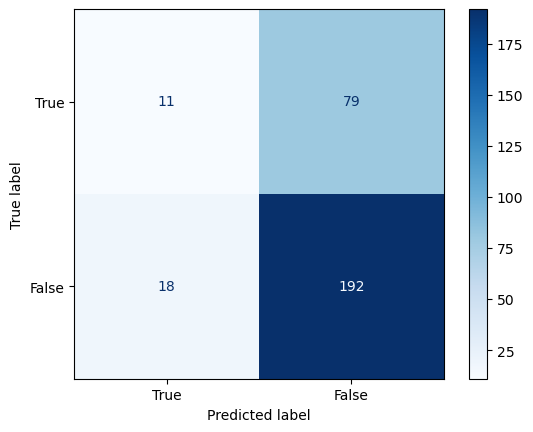

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, 
                                        y_pred, 
                                        labels = [True, False], 
                                        cmap = 'Blues' # colormap
                                       )

Compare the confusion matrix values with the precision and recall scores. Can you derive the scores from the matrix?

# Class weights for imbalanced data

From the very low recall, we see that the model is having difficulty picking out the ```True``` cases: most of the predictions are ```False``` (you can also see this by looking at the confusion matrix from Notebook 4).

One reason for this is that our data is imbalanced. One simple way of accounting for imbalance is to set the option ```class_weight = 'balanced'``` when initializing our Logistic Regression model.

This places _more weight on the minority samples, and less weight on the majority samples_, which causes the model to focus more on the minority samples. 

Another way to think about this is that instead of log-loss, it causes the model to minimize a "balanced log-loss" (just like how we use balanced accuracy instead of accuracy on imbalanced data).

In [20]:
log = LogisticRegression(penalty = None,
                         class_weight = 'balanced'  # <-- set the class_weight option
                        )

log.fit(X_train, y_train)
y_pred = log.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.73      0.58      0.65       210
        True       0.33      0.49      0.40        90

    accuracy                           0.55       300
   macro avg       0.53      0.53      0.52       300
weighted avg       0.61      0.55      0.57       300



Let's take a moment to compare the scores from the two classification reports. Compared to the previous model, by setting ```class_weight = 'balanced'```, we see that:

- Accuracy has dropped from 68% to 55%
- Balanced accuracy (i.e. macro avg recall) hasn't changed much
- Precision for both classes hasn't changed much
- Recall and F1 for the False class has dropped from more than 80% to around 60%
- Recall and F1 for the True class has improved from less than 20% to more than 40%!

We see that we can't always have the best of all worlds: high precision and recall for both classes.

However, we now have a model that is able to at least pick out around 50% of Bad Risk cases (i.e. the True class), just by changing one parameter.

Next time, we'll see other ways of improving this model (such as by including more features). For now, let's move on to cross validation.

# K-Fold Cross Validation

The results above depended on how we split our data. If we chose a different random state, we would get different results (try it!). As we saw in class, we can do repeated shuffle splits to see how the scores change with different splits.

But for today, we will do k-fold cross validation. 

Like train-test split, we can also use the **stratified** version for classification, to ensure that the class proportions are as similar as possible to the original dataset's proportions.

We specify the number of folds using the ```n_splits``` parameter.

In [21]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits = 5, # number of folds (i.e. the 'K' in 'K-Fold')
                     shuffle = True,  # always good to shuffle
                     random_state = 2023
                    )

To illustrate what this does, we will use ```cv``` to produce splits, and train and test on each of those splits manually, and calculate the precision. However, in practice, you will seldom have to do this.

In [22]:
for train_index, test_index in cv.split(X,y):
    X_train = X.loc[train_index]
    X_test  = X.loc[test_index]
    y_train = y.loc[train_index]
    y_test =  y.loc[test_index]
    
    log.fit(X_train, y_train)
    y_pred = log.predict(X_test)
    
    print(precision_score(y_test, y_pred))

0.35
0.38202247191011235
0.45454545454545453
0.38271604938271603
0.38095238095238093


In practice, we will rarely have to interact with the ```cv``` object directly.

Instead, we often just pass the ```cv``` object we created to other methods that automate the above process for us.

One such method is ```cross_val_score```:

In [23]:
from sklearn.model_selection import cross_val_score

cross_val_score(log,                   # model 
                X, y,                  # data (it will split into train and test for you)
                scoring = 'precision', # what metric you want to compute
                cv = cv                # notice we are passing our cv object in as a parameter
               ) 

array([0.35      , 0.38202247, 0.45454545, 0.38271605, 0.38095238])

Note that we specified the scoring parameter with a string, ```'precision'```. To see what string to use to specify other metrics, see this table:

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

We can also use ```cross_validate```, which does a few more things than ```cross_val_score```:
- it allows us to compute multiple metrics
- it also reports other things like training times (which might be useful for larger datasets and more complex models)

In [24]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(log, X, y, scoring = ['precision', 'recall', 'f1'], cv = cv)
cv_results

{'fit_time': array([0.01111031, 0.01630068, 0.00819421, 0.01612711, 0.01604533]),
 'score_time': array([0.00831032, 0.00800252, 0.0081079 , 0.        , 0.        ]),
 'test_precision': array([0.35      , 0.38202247, 0.45454545, 0.38271605, 0.38095238]),
 'test_recall': array([0.46666667, 0.56666667, 0.58333333, 0.51666667, 0.4       ]),
 'test_f1': array([0.4       , 0.45637584, 0.51094891, 0.43971631, 0.3902439 ])}

To display the results a little more nicely, we can also put the results in a DataFrame:

In [25]:
cv_results_df = pd.DataFrame(cv_results)
cv_results_df

,fit_time,score_time,test_precision,test_recall,test_f1
0,0.011110,0.008310,0.350000,0.466667,0.400000
1,0.016301,0.008003,0.382022,0.566667,0.456376
2,0.008194,0.008108,0.454545,0.583333,0.510949
3,0.016127,0.000000,0.382716,0.516667,0.439716
4,0.016045,0.000000,0.380952,0.400000,0.390244


Now that we have multiple splits, we can take the mean and standard deviation of these scores:

In [26]:
cv_results_df.std()

fit_time          0.003710
score_time        0.004460
test_precision    0.038616
test_recall       0.075093
test_f1           0.048415
dtype: float64

In [27]:
cv_results_df.mean()

fit_time          0.013556
score_time        0.004884
test_precision    0.390047
test_recall       0.506667
test_f1           0.439457
dtype: float64

To compare multiple models, we can decide on a metric, then compute their mean test scores across the same 5-folds.

For example, let's compare against a 10-Nearest Neighbours model:

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)

cv_results_knn = cross_validate(knn,  # changed model to knn
                                X, y, scoring = ['precision', 'recall', 'f1'], cv = cv)

pd.DataFrame(cv_results_knn).mean()

fit_time          0.000041
score_time        0.008309
test_precision    0.527549
test_recall       0.126667
test_f1           0.201623
dtype: float64

Using the same ```cv``` object ensures that we are getting the same splits for logistic regression and kNN, so these numbers can be directly compared.